# Esta es una prueba de como se puede realizar un notebook usando el kernel de octave.

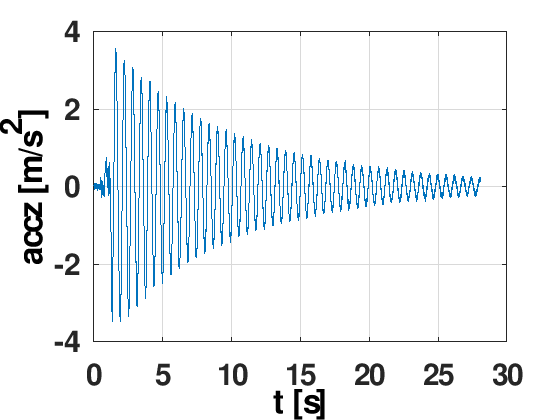

In [4]:
clear
close all

Acc=load('accPayaso_2');
accx=(Acc(:,1)-mean(Acc(:,1)))*(3.3/4096);
accy=(Acc(:,2)-mean(Acc(:,2)))*(3.3/4096);
accz=(Acc(:,3)-mean(Acc(:,3)))*(3.3/4096);
t=[0:0.001:(max(size(Acc))-1)*0.001];

%figure 
%plot(t,(accx/0.33)*9.81)
%set(gcf,'Visible','on')
%figure 
%plot(t,(accy/0.33)*9.81)
%set(gcf,'Visible','on')
figure
plot(t,(accz/0.403)*9.81)
set(gcf,'Visible','on')

grid
set(gcf,'Visible','on')

 set(gca,'defaulttextinterpreter','latex')
  
   set(get(gca,'XLabel'),'String','t [s]',...
                    'FontName','times news roman',...
                    'FontAngle','normal',...
                    'FontSize',20)
% 
 set(get(gca,'YLabel'),'String','accz [m/s^2]',...
                     'FontName','times news roman',...
                     'FontAngle','normal',...
                     'FontSize',20)

 
set(gca,'fontsize',20);
set(gca,'fontname','Times New Roman','FontWeight','Bold');  


Transfer function 'sis' from input 'u1' to output ...

               1         
 y1:  -------------------
      2.5 s^2 + 3 s + 350

Continuous-time model.


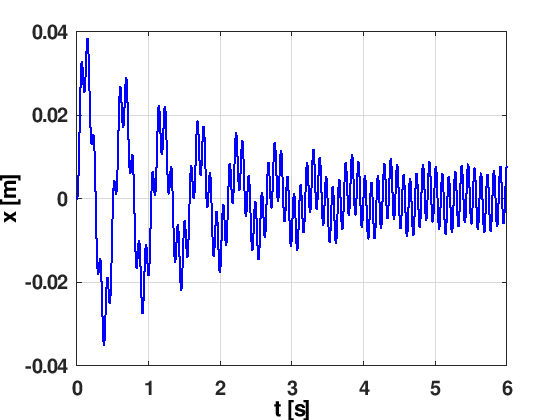

In [1]:
m=2.5;
b=3;
k=350;
pkg load control
v=60*(1000/3600);
L=1.5;
A=0.2;

t=0:0.001:6;

sis=tf([1],[m b k])



F=b*2*pi*(v/L)*A*cos(2*pi*(v/L)*t)+k*A*sin(2*pi*(v/L)*t); 
%F=ones(size(t));
%F=sin(40.*t);

[ys,t,x]=lsim(sis,[1*F'],t);
%Se grafica la respuesta del sistema x(t) t
y=ys(:,1);

figure(100)
plot(t,y,'b','LineWidth',1)
set(gcf,'Visible','on')

grid

 set(gca,'defaulttextinterpreter','latex')
  
   set(get(gca,'XLabel'),'String','t [s]',...
                    'FontName','times news roman',...
                    'FontAngle','normal',...
                    'FontSize',20)
% 
 set(get(gca,'YLabel'),'String','x [m]',...
                     'FontName','times news roman',...
                     'FontAngle','normal',...
                     'FontSize',20)

 
set(gca,'fontsize',20);
set(gca,'fontname','Times New Roman','FontWeight','Bold');      


sis.a =
                x1          x2          x3          x4          x5          x6
   x1       -13.73       7.689           0           0           0           0
   x2        7.785      -15.79       8.005           0           0           0
   x3            0       7.842      -7.842           0           0           0
   x4            0           0           0      -79.55           0           0
   x5            0           0           0           0      -241.1           0
   x6            0           0           0           0           0      -409.1
   x7            1           0           0           0           0           0
   x8            0           1           0           0           0           0
   x9            0           0           1           0           0           0
   x10           0           0           0           1           0           0
   x11           0           0           0           0           1           0
   x12           0           0           0 

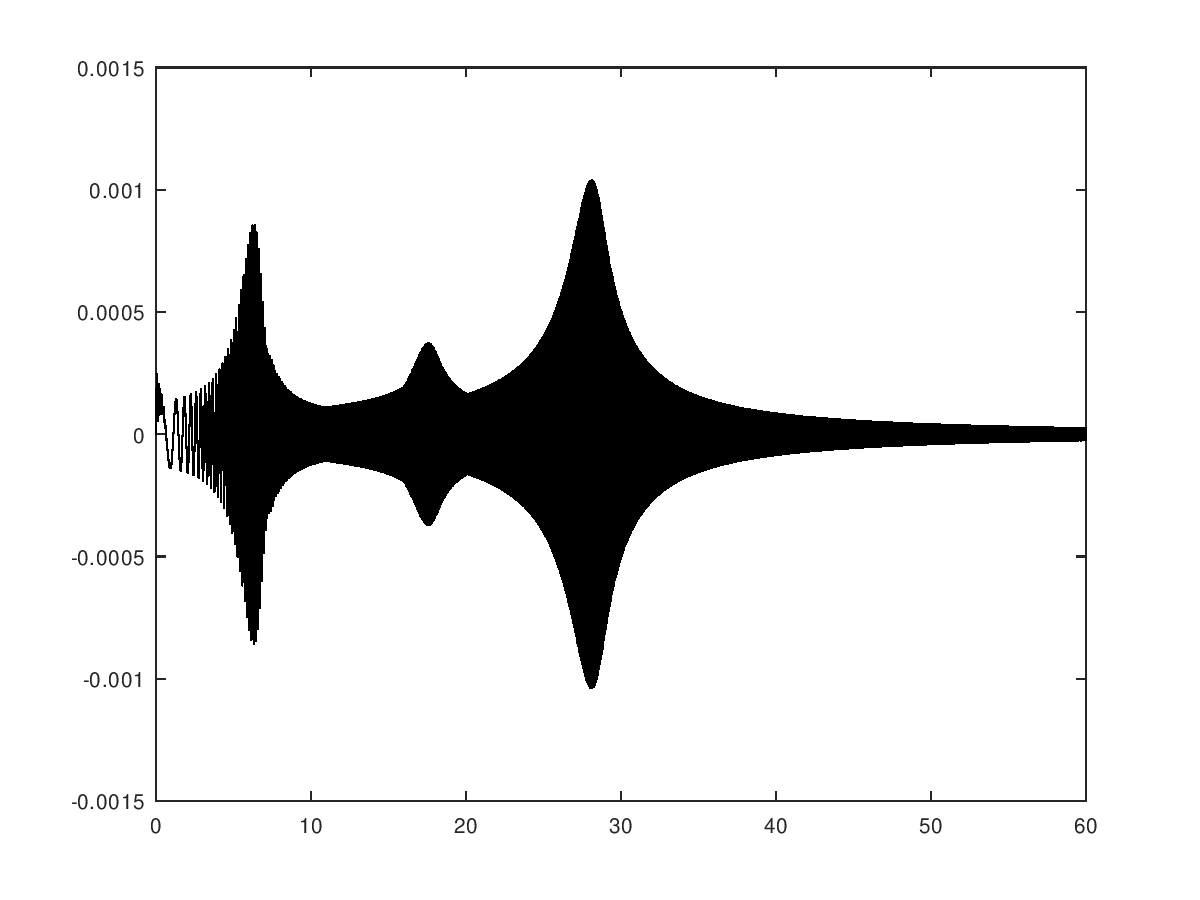

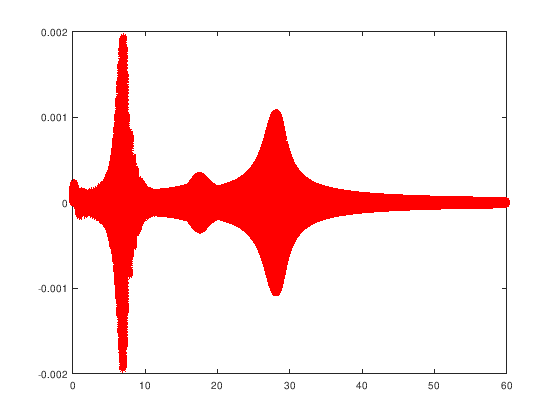

In [2]:
%clear
pkg load control
pkg load signal

m1=0.243;
m2=0.240;
m3=0.245;

M=([m1 0 0;0 m2 0;0 0 m3]);

 
 k1=(7070.65+1640.198);
 k2=1680.35;
 k3=1675.35;
 
%c1=1.4685;
%c2=1.8685;
%c3=1.9213;
 
 b3=1.9213;
 b2=1.8685;
 b1=1.4685;

 K=[k1+k2 -k2 0;-k2 k2+k3 -k3;0 -k3 k3];
 C1=[b1+b2 -b2 0;-b2 b2+b3 -b3;0 -b3 b3];
 %C1=[b1 0 0;0 b2 0;0 0 b3];

%K=[k1+k2 -k2;-k2 k2]
%Se hace la representación del sistema en espacio de estados  
 %A1=[C1 M;M zeros(size(M))];%  B=[1 0 0;0 1 0;0 0 1;0 0 0;0 0 0;0 0 0];
 %C=[1 0 0 0 0 0;0 1 0 0 0 0;0 0 1 0 0 0];

Bf=1.0*[1;0;0];
Bfl=1.0*[0;0;1];
%33.5274   19.7630    6.5196
wn3= 33.5274*2*pi;
wn2=2*pi*19.7630;
wn=2*pi*6.5196;

g=0.38*wn^2;
g2=0.28*wn2^2;
g3=0.032*wn3^2;


psi=0.971;

Mx=[M Bf*0 Bf*0 Bf*0;Bf'*0 1 0 0;Bf'*0 0 1 0; Bf'*0 0 0 1];
Cx=[C1 Bf*0 Bf*0 Bf*0;Bf'*0 2*psi*wn 0 0;Bf'*0 0 2*psi*wn2 0;Bf'*0 0 0 2*psi*wn3];
Kx=[K -g*Bf -g2*Bf -g3*Bf;-g*Bfl' wn^2 0 0;-g2*Bfl' 0 wn2^2 0;-g3*Bfl' 0 0 wn3^2];


 A1=[zeros(size(Mx)) Mx;Mx Cx];
 B1=[-Mx zeros(size(Mx));zeros(size(Mx)) Kx];
 A2=(inv(A1)*(-B1));
 
 B=inv(A1);
 
 %[0 0 0 1 0 0;0 0 0 0 1 0;0 0 0 0 0 1]
C=[zeros(size(M)) zeros(size(M)) eye(size(M)) zeros(size(M))];
 D=[0];
 %[a,b,c,d]=ss(A2,B,C,D);
 sis=ss(A2,B,C,D)
 
% [num den]=ss2tf(sis.a,sis.b,sis.c,sis.d,[1])
% figure
% rlocus(num(1,:),den)
% figure
% rlocus(num(2,:),den)
% figure
% rlocus(num(3,:),den)
% figure
% rlocus(num(4,:),den)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
orden=size(A1);
t=0:0.001:60;
dt=0.001;
tam=size(t);
sis=ss(A2,B,C,D);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%Se simula el sistema con fuerzas 0 y condiciones iniciales 0.03m y 0m/s

% [ys,t,x]=initial(sis,[0.03;0],t);

% ys=ys';
% t=t';
%[u,t] =gensig('square',5.6,5.6,0.01)

F=chirp(t,0,50,60); 
%F=[4*ones(tam(2),1)]';
%F=4*sin(33.5274*2*pi*t);


[y_s,t,x]=lsim(sis,[0*F',0*F',0*F',0*F',0*F',0*F',1*F',0*F',0*F',0*F',0*F',0*F'],t);

%[y_s]=step(sis,t);

%[ys,t,x]=initial(sis,[0.012;0.0085;0.0015;0;0;0],t);
%Se grafica la respuesta del sistema x1 y x2 contra t
%x1=0.85*exp(-0.078.*t).*ys(:,1)+1.2*0.00000*0.85*exp(-0.78.*t).*rand(size(t),1)+0.09*0*cos(300*t)-0.29*0*0.85*exp(-0.78.*t).*sin(3.5*t);

% x3exp=0.85*exp(-0.0078.*t).*ys(:,1)+0.0003*rand(size(t),1)+0.00049*cos(3*t);
%Se utiliza el desplazamniento x1 para la estimación
%y=x1;
yx=y_s(:,:,1);
y=yx(:,2);

figure(101)

plot(t,yx,'k')
set(gcf,'Visible','on')
hold on

Bf=1.0*[1;0;0];
Bfl=0.0*[0;0;1];
%33.5274   19.7630    6.5196
wn3= 33.5274*2*pi;
wn2=2*pi*19.7630;
wn=2*pi*6.5196;

g=0*0.0018*wn^2;
g2=0*0.0082*wn2^2;
g3=0*0.022*wn3^2;


psi=0.971;

Mx=[M Bf*0 Bf*0 Bf*0;Bf'*0 1 0 0;Bf'*0 0 1 0; Bf'*0 0 0 1];
Cx=[C1 Bf*0 Bf*0 Bf*0;Bf'*0 2*psi*wn 0 0;Bf'*0 0 2*psi*wn2 0;Bf'*0 0 0 2*psi*wn3];
Kx=[K -g*Bf -g2*Bf -g3*Bf;-g*Bfl' wn^2 0 0;-g2*Bfl' 0 wn2^2 0;-g3*Bfl' 0 0 wn3^2];


 A1=[zeros(size(Mx)) Mx;Mx Cx];
 B1=[-Mx zeros(size(Mx));zeros(size(Mx)) Kx];
 A2=(inv(A1)*(-B1));
 
 B=inv(A1);
 
 %[0 0 0 1 0 0;0 0 0 0 1 0;0 0 0 0 0 1]
C=[zeros(size(M)) zeros(size(M)) eye(size(M)) zeros(size(M))];
 D=[0];
 %[a,b,c,d]=ss(A2,B,C,D);
 sis=ss(A2,B,C,D)
 
% [num den]=ss2tf(sis.a,sis.b,sis.c,sis.d,[1])
% figure
% rlocus(num(1,:),den)
% figure
% rlocus(num(2,:),den)
% figure
% rlocus(num(3,:),den)
% figure
% rlocus(num(4,:),den)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
orden=size(A1);
t=0:0.001:60;
dt=0.001;
tam=size(t);
sis=ss(A2,B,C,D);
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%Se simula el sistema con fuerzas 0 y condiciones iniciales 0.03m y 0m/s

% [ys,t,x]=initial(sis,[0.03;0],t);

% ys=ys';
% t=t';
%[u,t] =gensig('square',5.6,5.6,0.01)

F=chirp(t,0,50,60); 
%F=[4*ones(tam(2),1)]';
%F=4*sin(33.5274*2*pi*t);


[y_sp,tp,xp]=lsim(sis,[0*F',0*F',0*F',0*F',0*F',0*F',1*F',0*F',0*F',0*F',0*F',0*F'],t);

%[y_s]=step(sis,t);

%[ys,t,x]=initial(sis,[0.012;0.0085;0.0015;0;0;0],t);
%Se grafica la respuesta del sistema x1 y x2 contra t
%x1=0.85*exp(-0.078.*t).*ys(:,1)+1.2*0.00000*0.85*exp(-0.78.*t).*rand(size(t),1)+0.09*0*cos(300*t)-0.29*0*0.85*exp(-0.78.*t).*sin(3.5*t);

% x3exp=0.85*exp(-0.0078.*t).*ys(:,1)+0.0003*rand(size(t),1)+0.00049*cos(3*t);
%Se utiliza el desplazamniento x1 para la estimación
%y=x1;
yxp=y_sp(:,:,1);
y=yx(:,2);


figure(102)
plot(tp,yxp,'r *')
set(gcf,'Visible','on')
 



In [ ]:
clear
close all
t=[0:0.001:2];
x_t=exp(-2*t).*cos(18.5*t);
figure
plot(t,x_t,'LineWidth',2)
set(gcf,'Visible','on')

grid

 set(gca,'defaulttextinterpreter','latex')
  
   set(get(gca,'XLabel'),'String','t [s]',...
                    'FontName','times news roman',...
                    'FontAngle','normal',...
                    'FontSize',20)
% 
 set(get(gca,'YLabel'),'String','x [m]',...
                     'FontName','times news roman',...
                     'FontAngle','normal',...
                     'FontSize',20)

 
set(gca,'fontsize',20);
set(gca,'fontname','Times New Roman','FontWeight','Bold'); 